In [139]:
import pandas as pd
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_extraction.text import TfidfVectorizer
# from keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio
import sounddevice as sd
from scipy.io.wavfile import write




In [36]:
paths = []
labels = []

for dir_name, _, file_names in os.walk('./TESS Toronto emotional speech set data'):
    for file_name in file_names:
        paths.append(os.path.join(dir_name, file_name))
        label = file_name.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
    

In [37]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels

In [38]:
df.head()

,speech,label
0,./TESS Toronto emotional speech set data\OAF_a...,angry
1,./TESS Toronto emotional speech set data\OAF_a...,angry
2,./TESS Toronto emotional speech set data\OAF_a...,angry
3,./TESS Toronto emotional speech set data\OAF_a...,angry
4,./TESS Toronto emotional speech set data\OAF_a...,angry


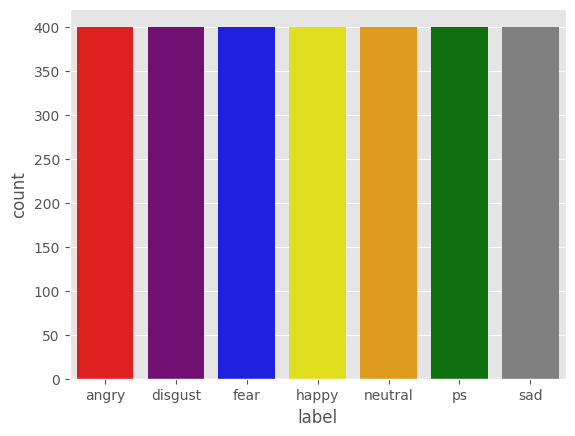

In [58]:
plt.style.use("ggplot")
custom_palette = {"fear": "blue", "ps": "green", "angry": "red", "happy": "yellow", "disgust": "purple", "neutral": "orange", "sad": "gray"}

sns.countplot(data = df, x = "label",hue="label",palette= custom_palette)
plt.show()

In [61]:
Audio(paths[4])

In [68]:
def extract_mfcc(filename, max_length=500):
    audio, sr = librosa.load(filename, sr=None)
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sr)
    if mfcc.shape[1] < max_length:
        pad_width = max_length - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_length]
    
    mfcc_flat = mfcc.flatten()
    
    return mfcc_flat

In [174]:
X = np.array([extract_mfcc(file) for file in df['speech']])
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['label'])

svm_model = SVC()
svm_model.fit(X, y_encoded)

SVC()

In [189]:

filename = "recorded_audio.wav"

duration = 2

sample_rate = 44100
print("Recording audio...")
audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='int16')
sd.wait()

write(filename, sample_rate, audio_data)

print("Audio recording saved to", filename)



Recording audio...
Audio recording saved to recorded_audio.wav


In [190]:
audio_path = filename
mfcc_features = extract_mfcc(audio_path)
predicted_label_encoded = svm_model.predict([mfcc_features])
predicted_label = label_encoder.inverse_transform(predicted_label_encoded)
print("Predicted label:", predicted_label[0])

Predicted label: ps


In [191]:
Audio(audio_path)